---
# 1.1 Scientific computing
---

## Motivation

- Computers have become a central tool that is used in virtually every discipline:  

    - mathematics
    - engineering
    - physical sciences
    - social sciences
    - economics
    - data science
    - ...

- In these disciplines, **mathematical models** are used to explore and gain a deeper understanding of complex systems.

- There is now a growing need for those with the ability to develop software that can _efficiently_, _accurately_, and _reliably_ solve mathematical models.

## Overview

In this class, we will learn computational methods (algorithms) for working with _continuous_ mathematical models:
    
| Chapter | Topic |
|--------:|-------|
|  3 | Nonlinear Equations in One Variable |
| 10 | Polynomial Interpolation |
| 11 | Piecewise Polynomial Interpolation |
| 12 | Best Approximation |
| 14 | Numerical Differentiation |
| 15 | Numerical Integration |
| 16 | Differential Equations |

## Goals

Learning these algorithms will give you the knowledge and skills to solve more complex problems you may encounter in your careers. We will study:

1. The theory behind the algorithms (numerical analysis):
    - complexity and convergence rate
    - problem conditioning and algorithm stability
    - accuracy and error bounds
    - proofs
2. How to choose which method should be used for a particular problem.
3. How to implement the method efficiently.
    - We will use [Julia](http://julialang.org): "a high-level, high-performance dynamic programming language for technical computing."
    - See [Julia benchmarks](http://julialang.org/benchmarks/) for a comparison with various other languages.
4. How to evaluate and test your implementation for *efficiency*, *accuracy*, and *robustness*.

---
# Section 1.2: Numerical algorithms and errors
---

Suppose some quantity $u$ is approximated by $v$. The **absolute error** is measured by

$$
|u - v|.
$$

Often, it is better to look at how large $|u-v|$ is compared to $|u|$. If $|u-v|$ is $p$ percent of $|u|$, then 

$$
|u-v| = p|u|.
$$ 

If $u \neq 0$, then
$$
p = \frac{|u-v|}{|u|},
$$
which is called the **relative error**.

In [1]:
u, v = π, 3.14159

(π, 3.14159)

In [2]:
u

π = 3.1415926535897...

In [3]:
abs(u - v)

2.6535897932333796e-6

i.e., $\approx 2.6 \times 10^{-6}$

In [4]:
p = abs(u - v)/abs(u)

8.446638650625857e-7

i.e., $\approx 8.4 \times 10^{-7}$

In [5]:
# Number of digits of accuracy
-log10(p)

6.0733160846496

In [6]:
typeof(8.4e-7)

Float64

In [7]:
typeof(8.4f-7)

Float32

---

## Exercise
Complete the following table.

| $u$ | $v$ | absolute error | relative error |
|:---:|:---:|:--------------:|:--------------:|
|   1 |  0.99 | 0.01 | 0.01 |
|   1 |  1.5  |  0.5 | 0.5|
| 100 | 99.99 | 0.01 | 0.0001 |
| 100 | 100.5 | 0.5  | 0.005 |

In [8]:
abs(100 - 99.99)/abs(100)

0.00010000000000005117

In [9]:
abs(100 - 100.5)/abs(100)

0.005

In [10]:
-log10(0.0001)

4.0

In [11]:
-log10(0.005)

2.3010299956639813

---

## Error types

1. Errors in mathematical model or in the data
2. Approximation errors
3. Roundoff errors
    - due to the finite precision of real numbers stored on a computer

## Approximation Error (approximating the derivative)

Consider the formula for the derivative of a differentiable function $f \colon \mathbb{R} \to \mathbb{R}$ at $x_0$:

$$ f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}.$$

It is therefore reasonable to approximate $f'(x_0)$ using

$$\frac{f(x_0 + h) - f(x_0)}{h}$$

for some small positive $h$. The error in this approximation is 

$$\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right|$$

and is called a **discretization error**.

---

## Example

Let's computationally examine this approximation error using

$$
f(x) = \sin(x) \quad \text{and} \quad x_0 = 1.
$$

Note that $f'(x) = \cos(x)$.

In [12]:
f(x) = sin(x)

f (generic function with 1 method)

Another way to define the function $f$ in Julia:
```julia
function f(x)
    return sin(x)
end
```

In [13]:
x0 = 1.0
fp = cos(x0)

0.5403023058681398

Thus 

$$f'(x_0) = \cos(1) = 0.5403023058681398\ldots.$$ 

Let's write some **Julia** code to approximate this value using 

$$ 
f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}
$$

for smaller and smaller values of $h$.

In [14]:
using Printf

function approxderiv(f, x0, fp)
    @printf("%6s %20s %12s %10s %8s\n", "h", "fpapprox", "abserr", "relerr", "digits")
    for i = 1:16
        h = 10.0^(-i)
        fpapprox = (f(x0 + h) - f(x0))/h
        abserr = abs(fp - fpapprox)
        relerr = abs(fp - fpapprox)/abs(fp)
        digits = -log10(relerr)
        @printf("%6.0e %20.16f %12.4e %10.2e %8.1f\n", h, fpapprox, abserr, relerr, digits)
    end
end

approxderiv(f, x0, fp)

     h             fpapprox       abserr     relerr   digits
 1e-01   0.4973637525353891   4.2939e-02   7.95e-02      1.1
 1e-02   0.5360859810118689   4.2163e-03   7.80e-03      2.1
 1e-03   0.5398814803603269   4.2083e-04   7.79e-04      3.1
 1e-04   0.5402602314186211   4.2074e-05   7.79e-05      4.1
 1e-05   0.5402980985058647   4.2074e-06   7.79e-06      5.1
 1e-06   0.5403018851213304   4.2075e-07   7.79e-07      6.1
 1e-07   0.5403022640404487   4.1828e-08   7.74e-08      7.1
 1e-08   0.5403023028982545   2.9699e-09   5.50e-09      8.3
 1e-09   0.5403023584094058   5.2541e-08   9.72e-08      7.0
 1e-10   0.5403022473871033   5.8481e-08   1.08e-07      7.0
 1e-11   0.5403011371640787   1.1687e-06   2.16e-06      5.7
 1e-12   0.5403455460850636   4.3240e-05   8.00e-05      4.1
 1e-13   0.5395683899678261   7.3392e-04   1.36e-03      2.9
 1e-14   0.5440092820663267   3.7070e-03   6.86e-03      2.2
 1e-15   0.5551115123125783   1.4809e-02   2.74e-02      1.6
 1e-16   0.0000000000000

In [15]:
(1.0 + 1e-16) - 1.0

0.0

---

 ## Theorem: (Taylor Series)

Assume that $f$ is a function that is $(k+1)$-differentiable on an interval containing $x_0$ and $x_0 + h$. Then

$$
f(x_0 + h) = f(x_0) + h f'(x_0) + \frac{h^2}{2} f''(x_0) + \cdots + \frac{h^k}{k!} f^{(k)}(x_0) + \frac{h^{k+1}}{(k+1)!} f^{(k+1)}(\xi),
$$

for some $\xi \in (x_0, x_0 + h)$.

### Proof that the discretization error decreases at the same rate as $h$:

Solving for $f'(x_0)$ in the Taylor series expansion, we get

$$
f'(x_0) = \frac{f(x_0+h)-f(x_0)}{h} - \left(\frac{h}{2} f''(x_0) + \frac{h^2}{6} f'''(x_0)  + \cdots + \frac{h^{k-1}}{k!} f^{(k)}(\xi)\right).
$$

Therefore,

$$
\left|f'(x_0) - \frac{f(x_0+h)-f(x_0)}{h}\right| = \left|\frac{h}{2} f''(x_0) + \frac{h^2}{6} f'''(x_0) + \cdots + \frac{h^{k-1}}{k!} f^{(k)}(\xi)\right|.
$$

If $f''(x_0) \neq 0$ and $h$ is small, then the right-hand-side is dominated by $\frac{h}{2} f''(x_0)$. Thus,

$$
\left|f'(x_0) - \frac{f(x_0+h)-f(x_0)}{h}\right| \approx \frac{h}{2}\left| f''(x_0)\right| = \mathcal{O}(h). \quad \blacksquare
$$

(See p. 7 of Ascher-Greif for the rigorous definitions of Big-$\mathcal{O}$ and $\Theta$ notation).

## Example continued...

Recall that $f(x) = \sin(x)$. Thus $f''(x) = -\sin(x)$.

In [16]:
fpp = -sin(x0)

abs(fpp)/2

0.42073549240394825

Therefore, 
$$
\frac{\left|f''(x_0)\right|}{2} = 0.42073549240394825\ldots,
$$
which agrees very well with our numerical test.

---

## Exercise

What do you think will happen if $f''(x_0) = 0$? Write code to test your hypothesis.

In [17]:
x0 = π

π = 3.1415926535897...

In [18]:
fp = cos(x0)

-1.0

In [19]:
fpp = -sin(x0)

-0.0

$$
\left|f'(x_0) - \frac{f(x_0+h)-f(x_0)}{h}\right| \approx \frac{h^2}{6}\left| f'''(x_0)\right| = \mathcal{O}(h^2)
$$

In [20]:
approxderiv(f, x0, fp)

     h             fpapprox       abserr     relerr   digits
 1e-01  -0.9983341664682811   1.6658e-03   1.67e-03      2.8
 1e-02  -0.9999833334166328   1.6667e-05   1.67e-05      4.8
 1e-03  -0.9999998333331090   1.6667e-07   1.67e-07      6.8
 1e-04  -0.9999999983342189   1.6658e-09   1.67e-09      8.8
 1e-05  -0.9999999999776380   2.2362e-11   2.24e-11     10.7
 1e-06  -1.0000000000171467   1.7147e-11   1.71e-11     10.8
 1e-07  -0.9999999971387726   2.8612e-09   2.86e-09      8.5
 1e-08  -0.9999999816760610   1.8324e-08   1.83e-08      7.7
 1e-09  -0.9999999602756910   3.9724e-08   3.97e-08      7.4
 1e-10  -0.9999988580935718   1.1419e-06   1.14e-06      5.9
 1e-11  -0.9999878362723796   1.2164e-05   1.22e-05      4.9
 1e-12  -0.9999664359024261   3.3564e-05   3.36e-05      4.5
 1e-13  -0.9979760753634935   2.0239e-03   2.02e-03      2.7
 1e-14  -1.0091587146636705   9.1587e-03   9.16e-03      2.0
 1e-15  -0.7657137397853898   2.3429e-01   2.34e-01      0.6
 1e-16   1.2246467991473

In [21]:
fppp = -cos(x0)

abs(fppp)/6

0.16666666666666666

---

## Roundoff Error

Numbers are stored in the computer using a finite precision representation. Roughly 16 digits of precision are possible using the 64-bit floating point format.

Whenever an arithmetic operation takes place, the result must be rounded to roughly 16 digits of precision. Such an error is called **roundoff error**.

We can see the effect of roundoff error in our example when $h$ is very small.

---

## Exercise

Use the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package to make a plot of $h$ versus the absolute error in this approximation. What do you observe? Why is this happening?

In [22]:
using Plots

In [23]:
x0 = 1.0
f(x) = sin(x)

fp = cos(x0)
fpp = -sin(x0)

-0.8414709848078965

In [24]:
h = [10.0^(-x) for x in 0:0.5:20]

#approx = (f.(x0 .+ h) .- f(x0))./h

approx = @. (f(x0 + h) - f(x0))/h

abserr = abs.(fp .- approx)

[h abserr]

41×2 Matrix{Float64}:
 1.0          0.472476
 0.316228     0.140903
 0.1          0.0429386
 0.0316228    0.0133938
 0.01         0.00421632
 0.00316228   0.00133138
 0.001        0.000420826
 0.000316228  0.000133057
 0.0001       4.20744e-5
 3.16228e-5   1.33049e-5
 1.0e-5       4.20736e-6
 3.16228e-6   1.33048e-6
 1.0e-6       4.20747e-7
 ⋮            
 3.16228e-15  0.0136773
 1.0e-15      0.0148092
 3.16228e-16  0.189219
 1.0e-16      0.540302
 3.16228e-17  0.540302
 1.0e-17      0.540302
 3.16228e-18  0.540302
 1.0e-18      0.540302
 3.16228e-19  0.540302
 1.0e-19      0.540302
 3.16228e-20  0.540302
 1.0e-20      0.540302

In [25]:
using LaTeXStrings

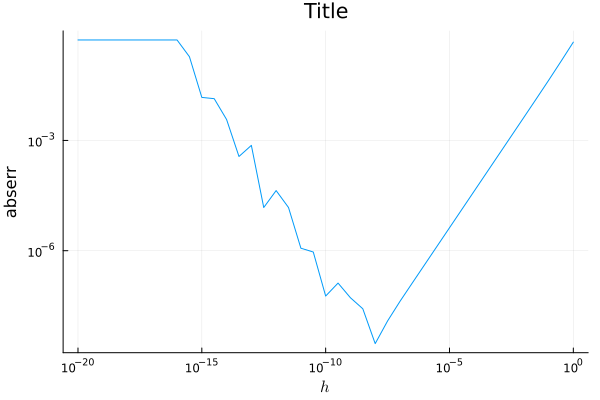

In [26]:
plot(h, abserr, 
    yscale=:log10, 
    xscale=:log10,
    xlabel=L"h",
    ylabel="abserr",
    label=false,
    title="Title"
)

In [27]:
d_err = h*abs(fpp)/2

[abserr d_err]

41×2 Matrix{Float64}:
 0.472476     0.420735
 0.140903     0.133048
 0.0429386    0.0420735
 0.0133938    0.0133048
 0.00421632   0.00420735
 0.00133138   0.00133048
 0.000420826  0.000420735
 0.000133057  0.000133048
 4.20744e-5   4.20735e-5
 1.33049e-5   1.33048e-5
 4.20736e-6   4.20735e-6
 1.33048e-6   1.33048e-6
 4.20747e-7   4.20735e-7
 ⋮            
 0.0136773    1.33048e-15
 0.0148092    4.20735e-16
 0.189219     1.33048e-16
 0.540302     4.20735e-17
 0.540302     1.33048e-17
 0.540302     4.20735e-18
 0.540302     1.33048e-18
 0.540302     4.20735e-19
 0.540302     1.33048e-19
 0.540302     4.20735e-20
 0.540302     1.33048e-20
 0.540302     4.20735e-21

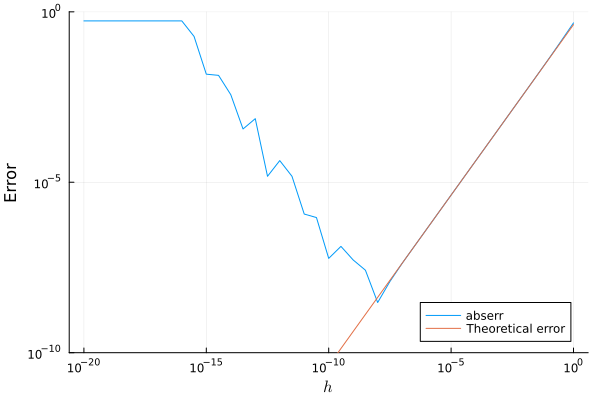

In [28]:
plot(h, abserr, 
    yscale=:log10, 
    xscale=:log10,
    xlabel=L"h",
    ylabel="Error",
    label="abserr",
    #title="Title",
    legend=:bottomright,
)

plot!(h, d_err, label="Theoretical error")
ylims!(1e-10, 1e0)

---
# 1.3 Algorithm properties
---

## Accuracy

As we have seen above, it is easy to write *mathematically correct* code that produces very inaccurate results.

Accuracy is affected by the following two conditions:

1. **Problem conditioning**  
    Some problems are highly sensitive to small changes in the input: we call such problems **ill-conditioned**. A problem that is not sensitive to small changes in the input is called **well-conditioned**. For example, computing $\tan(x)$ for $x$ near $\pi/2$ is an ill-conditioned problem (**Example 1.5** in Ascher-Greif).
2. **Algorithm stability**  
    An algorithm is called **stable** if it is guaranteed to produce an exact answer to a *slightly perturbed problem*. (**Example 1.6** in Ascher-Greif gives an example of an **unstable algorithm**).

In [29]:
pi/2

1.5707963267948966

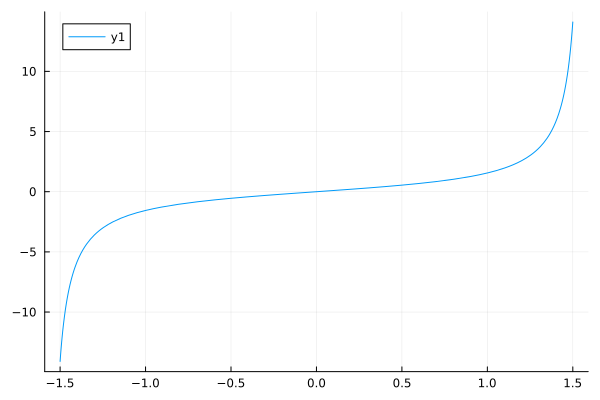

In [30]:
plot(tan, -1.5, 1.5)

---

## Exercise

Let 

$$ y_n = \int_0^1 \frac{x^n}{x + 10} dx. $$

Show that 

$$
y_n + 10y_{n-1} = \frac1n
$$

and that

$$
y_0 = \ln(11) - \ln(10).
$$

Then use these formulas to numerically compute $y_{30}$.

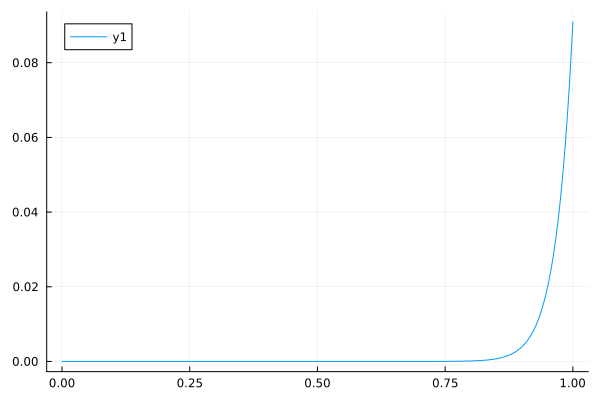

In [31]:
n = 30
plot(x -> x^n/(x+10), 0, 1)

In [32]:
yn = log(11) - log(10)

@printf("%4s %12s\n", "n", "y_n")
for n = 1:30
    yold = yn
    yn = 1/n - 10yold
    @printf("%4d %12.4e\n", n, yn)
end

   n          y_n
   1   4.6898e-02
   2   3.1018e-02
   3   2.3154e-02
   4   1.8465e-02
   5   1.5353e-02
   6   1.3138e-02
   7   1.1481e-02
   8   1.0194e-02
   9   9.1673e-03
  10   8.3270e-03
  11   7.6386e-03
  12   6.9473e-03
  13   7.4503e-03
  14  -3.0745e-03
  15   9.7411e-02
  16  -9.1161e-01
  17   9.1750e+00
  18  -9.1694e+01
  19   9.1699e+02
  20  -9.1699e+03
  21   9.1699e+04
  22  -9.1699e+05
  23   9.1699e+06
  24  -9.1699e+07
  25   9.1699e+08
  26  -9.1699e+09
  27   9.1699e+10
  28  -9.1699e+11
  29   9.1699e+12
  30  -9.1699e+13


In [33]:
using QuadGK

In [34]:
n = 30
integral, error = quadgk(x -> x^n/(x + 10), 0, 1)

(0.002940928704861327, 8.451193491963778e-12)

In [35]:
y0 = log(11) - log(10)

0.09531017980432477

This algorithm is *very* **unstable**.

---

## Efficiency

Efficiency of a code is affected by many factors:

1. the rate of convergence of the method
2. the number of arithmetic operations performed
3. how the data in memory is accessed

(See **Example 1.4** in Ascher-Greif for an efficient algorithm for evaluating polynomials: **Horner's rule**.)

---

## Robustness (Reliability)

We want to ensure that our code works under *all possible inputs*, and generates the clear warnings when it is not possible to produce an accurate result for some input.

---